# Salary Predictions Based on Job Descriptions
## Exploratory Data Analysis

This project explores the dataset containing job postings along with salaries. The aim of this project is to explore the dataset to find variables that correlates with the salary of a job. Using the training data, we will then build a predictive model that helps us predict salaries of job postings. 

### 1.0 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 2.0 Load Data

In [2]:
#Load train and test data into different dataframes
df1 = pd.read_csv('train_features.csv')
df2 = pd.read_csv('train_salaries.csv')
test_df = pd.read_csv('test_features.csv')

In [4]:
#Concatenating features with target (salaries) into a single dataframe
train_df = pd.concat([df1, df2['salary']], axis=1)

### 2.1 Identifying Numerical and Categorical Columns in the Data

In [5]:
train_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [6]:
numerical_cols = ['yearsExperience', 'milesFromMetropolis']

In [7]:
categorical_cols = ['jobID', 'companyId', 'jobType', 'degree', 'major', 'industry']

### 3.0 Clean Data

In [8]:
#finiding missing values
train_df.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

No missing values (Null/NaN) were found in the dataset

In [9]:
#looking at each column to find any invalid data
train_df['jobType'].value_counts()

SENIOR            125886
VICE_PRESIDENT    125235
MANAGER           125121
CTO               125046
JANITOR           124971
CEO               124778
JUNIOR            124594
CFO               124369
Name: jobType, dtype: int64

In [10]:
train_df['degree'].value_counts()

HIGH_SCHOOL    236976
NONE           236854
BACHELORS      175495
DOCTORAL       175364
MASTERS        175311
Name: degree, dtype: int64

In [11]:
train_df['major'].value_counts()

NONE           532355
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58596
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57801
Name: major, dtype: int64

In [12]:
train_df['industry'].value_counts()

WEB          143206
AUTO         142943
FINANCE      142867
EDUCATION    142819
OIL          142771
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64

In [13]:
#check for duplicate rows
train_df.duplicated().sum()

0

In [14]:
test_df.duplicated().sum()

0

In [15]:
#finding invalid data for numerical features
train_df.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


While yearsExperience and milesFromMetrpolis both have reasonable minimum, maximum and mean values, salary feature includes one or more rows with 0 value. Therefore, we will visualize the salaries distribution in order to identify outliers.

### 3.1 Removing Outliers in Salary

C:\Users\ali_j\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


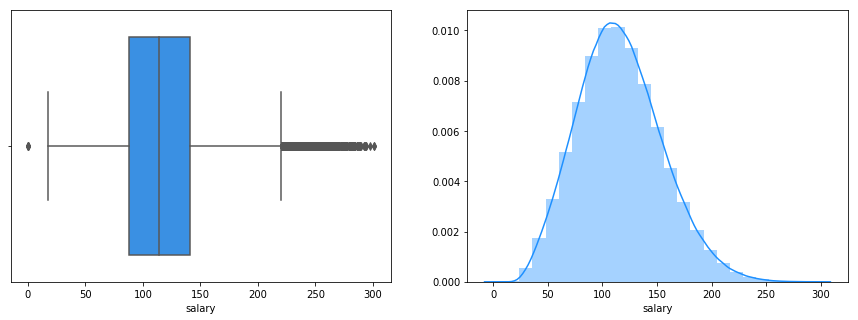

In [29]:
#visualizing the distribution of the Salary variable
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(train_df.salary, color='dodgerblue')
plt.subplot(1,2,2)
sns.distplot(train_df.salary, bins=25, color='dodgerblue')
plt.show()

In [30]:
#Using IQR to identify outliers
stat = train_df.salary.describe()
stat

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64

In [31]:
#Calculating the Inter Quartile Range (IQR)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5*IQR
lower = stat['25%'] - 1.5*IQR

print('The upper and lower bounds for outliers are {} and {} respectively.'.format(upper, lower))

The upper and lower bounds for outliers are 220.5 and 8.5 respectively.


In [32]:
#Outliers below the lower band (8.5K)
train_df[train_df.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [33]:
#dropping rows with 0 salaries
invalid_salary = train_df[train_df['salary'] == 0].index
train_df.drop(invalid_salary, axis=0, inplace=True)

In [34]:
#further evaluating outliers in the upper band (220.5K)
train_df.loc[train_df.salary > 220.5, 'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

It's not unusual for CEO, CFO, CTO, VP, Manager and Senior employees to earn more than 220.5K. However, Junior employees usually not earn such high salaries. 

In [35]:
#examining Junior roles in the upper band
train_df[(train_df.salary > 220.5) & (train_df.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


The above rows shows that all the JUNIOR roles are either in OIL and FINANCE industries where such high salaries for this job type is a possibility. All roles have experience of 18 or more years. Therefore, we don't have enough evidence to label the above rows as outliers. We will keep them in the data

### 4.0 Summarizing Each Feature

In [62]:
def plot_feature(df, col):
    '''
    Plot each features
    Left: the distribution of samples on the feature
    Right: the dependance of target variable on the feature
    '''
    
    plt.figure(figsize = (14,6))
    
    #Left plot
    plt.subplot(1,2,1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and label each category with mean target var (salary)
        mean = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    
    #Right plot
    plt.subplot(1,2,2)
    if df[col].dtype == 'int64' or col == 'companyId':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values - std.values, mean.values + std.values, alpha = 0.1)
    else:
        sns.violinplot(x=col, y='salary', data=df)
        
    plt.xticks(rotation=45)
    plt.ylabel('Salaries')
    plt.show()

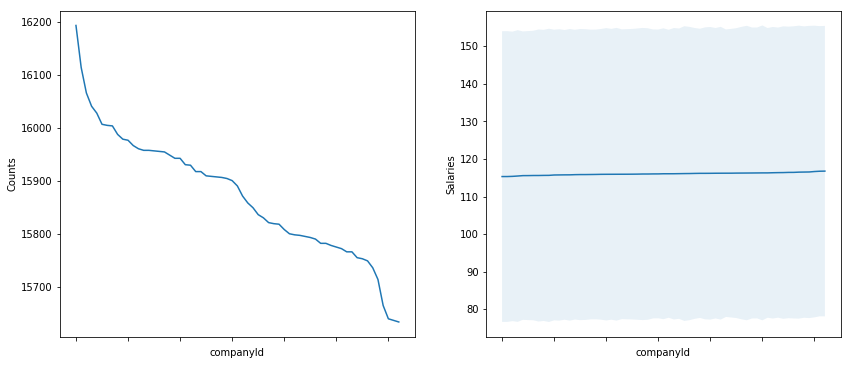

In [63]:
plot_feature(train_df, 'companyId')

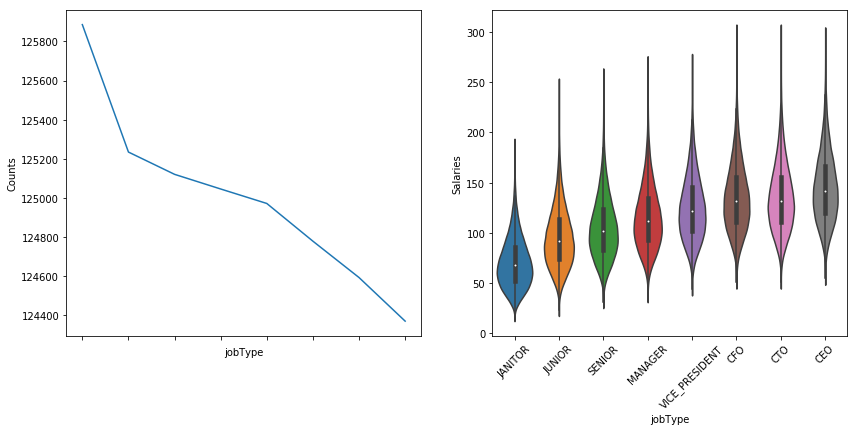

In [61]:
plot_feature(train_df, 'jobType')

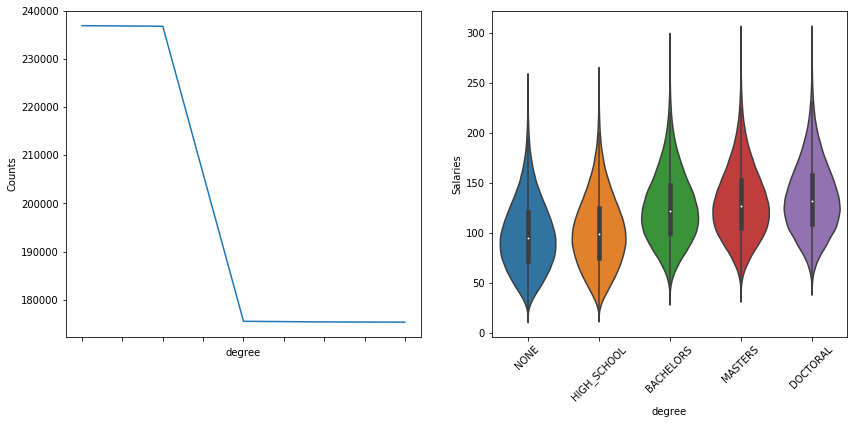

In [42]:
plot_feature(train_df, 'degree')

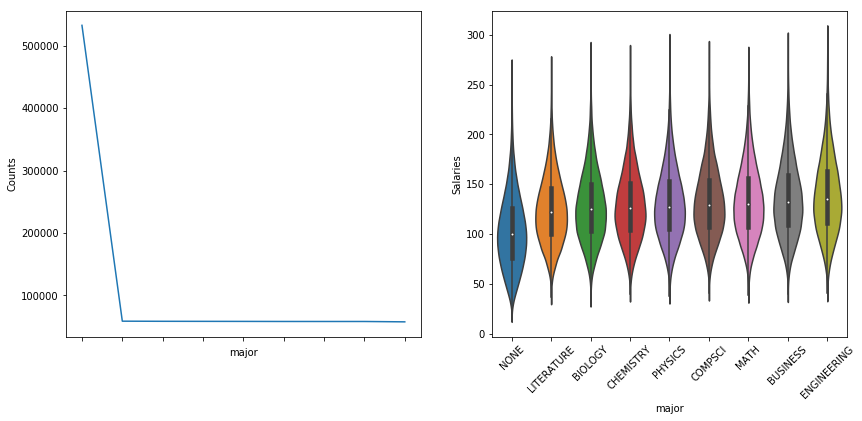

In [43]:
plot_feature(train_df, 'major')

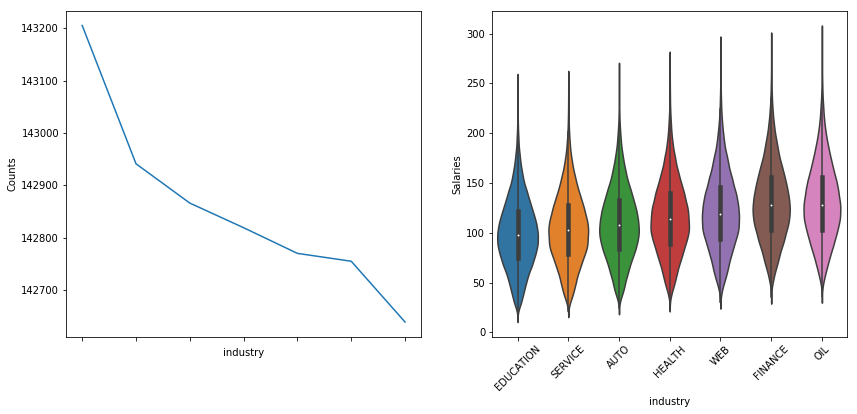

In [44]:
plot_feature(train_df, 'industry')

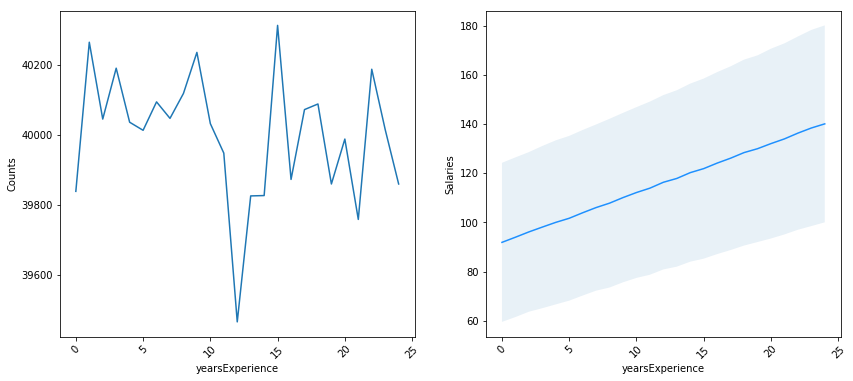

In [45]:
plot_feature(train_df, 'yearsExperience')

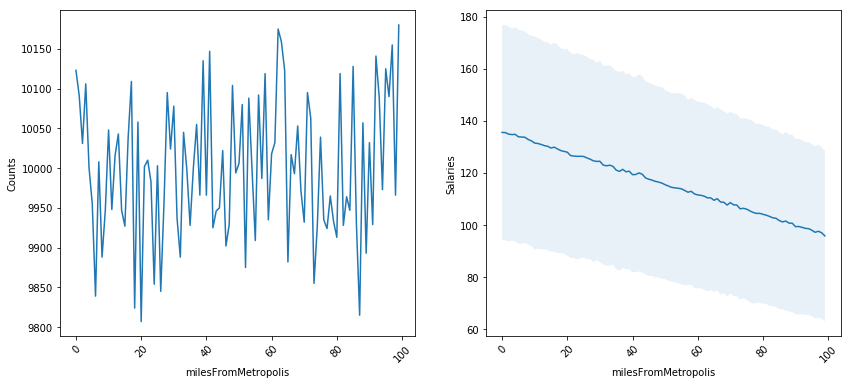

In [52]:
plot_feature(train_df, 'milesFromMetropolis')

#### Observations

1. CompanyID - an arbitary variable - have negligilble correlation with salaries
2. JobType correlates with salaries - Janitors earn the lowest, while CEOs earn the highest
3. No degree and High School Diploma earn the lowest, while Masters and Doctoral degrees earn the highest salaries 
4. Degree Major shows a trend as well where Science and Engineering earn more
5. Oil, Finance, and Tech industries pay more than industries like Education and Service
6. yearsExperience have a positive correlation with salary
7. milesFromMetropols have a negative correlation with salary - further the job is from the city centre, the less the salary is 

### 5.0 Correlation Matrix

In [64]:
#label encoding
def encode_label(df, col):
    #encode the categories by using average salary for each category
    cat_dict = {}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = train_df[train_df[col] == cat]['salary'].mean()
    df[col] = df[col].map(cat_dict)

In [65]:
for col in train_df.columns:
    if (train_df[col].dtype.name == "category") & (col != "jobId"):
        encode_label(train_df, col)

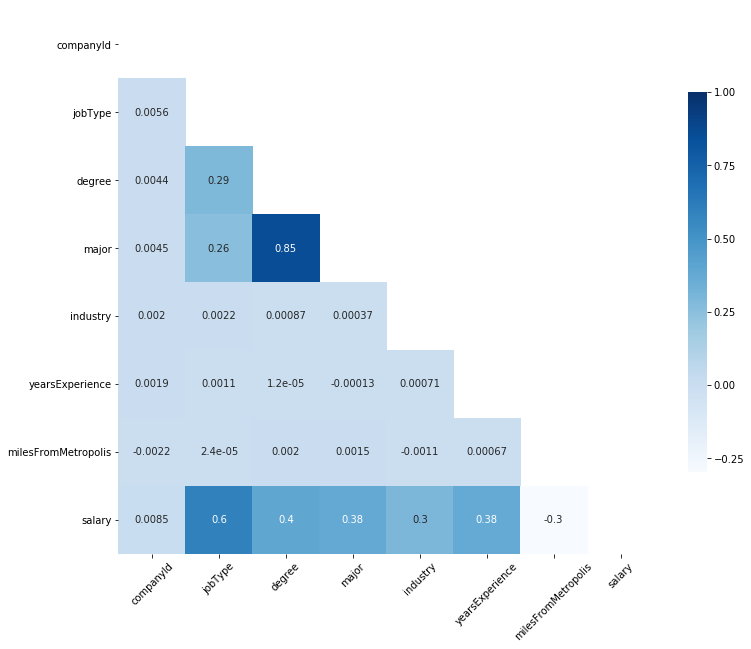

In [76]:
#Correlations matrix 
mask = np.triu(train_df[features + ['salary']].corr())

fig = plt.figure(figsize=(12,10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(train_df[features + ['salary']].corr(), cmap='Blues', annot=True, cbar_kws={"shrink": .70}, mask=mask)
plt.xticks(rotation=45)
plt.show()

#### Observations

1. Major and Degree have the highest correlation with each other with a value of 0.85
2. Salary correlates more with JobType, degree, majore, Industry, yearsExperience, and milesFromMetropolis.
3. Salary has a negative correlation only with milesFromMetropolis
4. Salary has little to no correlation with companyId

Therefore, the features of interest are jobType, degree, major, industry, yearsExperience and milesFromMetropolis. 